Go to <a href=#LinearRegression>Linear Regression</a>   

Go to <a href=#MixedEffect>Mixed Effect</a>


In [141]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
boy1600  = pd.read_csv("1allDistrict_boy1600.csv")
girl1600 = pd.read_csv("1allDistrict_girl1600.csv")
girl400 = pd.read_csv("1allDistrict_girl400.csv")
boy400 = pd.read_csv("1allDistrict_boy400.csv")

boy1600['sex']  = 'boy'
girl1600['sex'] = 'girl'
boy400['sex']  = 'boy'
girl400['sex'] = 'girl'


print(f"Girl 1600: {girl1600.shape}")
print(f"Boy  1600: {boy1600.shape}")
print(f"Girl 400:  {girl400.shape}")
print(f"Boy  400:  {boy400.shape}")

Girl 1600: (852, 12)
Boy  1600: (1204, 12)
Girl 400:  (382, 12)
Boy  400:  (444, 12)


In [4]:
athlete_data = pd.concat([boy1600,girl1600])
print(athlete_data.shape)
print(athlete_data.columns)

(2056, 12)
Index(['Unnamed: 0', 'ID', 'Name', 'School_ID', 'School', 'District', '9_PR',
       '10_PR', '11_PR', '12_PR', 'Grad_Yr', 'sex'],
      dtype='object')


## Set up X and y

Variable  |Description                    |Value
----------|------------------------------:|:----
District 1|Athlete school in this district| 0 or 1
District 2|Athlete school in this district| 0 or 1
District 3|Athlete school in this district| 0 or 1
District 4|Athlete school in this district| 0 or 1
District 5|Athlete school in this district| 0 or 1
District 6|Athlete school in this district| 0 or 1
District 7|Athlete school in this district| 0 or 1
District 8|Athlete school in this district| 0 or 1
District 9|Athlete school in this district| 0 or 1
Sex       |Athlete girl or boy            | 1=boy, 0=girl
Grad Year |Graduation Year                | int
9th Grade PR|Best time in 9th Grade       | float
10th Grade PR|Best time in 10th Grade     | float
11th Grade PR|Best time in 11th Grade     | float|  

In [97]:
X = pd.DataFrame()
X = pd.get_dummies(athlete_data[['District','sex']])

X = pd.concat([X, athlete_data[['9_PR','10_PR','11_PR','Grad_Yr']]], axis=1, sort=False)

In [98]:
X.shape

(2056, 14)

In [99]:
X.head()

,District_District 1,District_District 2,District_District 3,District_District 4,District_District 5,District_District 6,District_District 7,District_District 8,sex_boy,sex_girl,9_PR,10_PR,11_PR,Grad_Yr
0,0,0,1,0,0,0,0,0,1,0,271.44,264.50,255.28,2011
1,0,0,1,0,0,0,0,0,1,0,276.00,265.58,268.16,2011
2,0,0,0,0,1,0,0,0,1,0,293.90,278.42,281.35,2011
3,1,0,0,0,0,0,0,0,1,0,283.22,264.46,261.56,2012
4,0,0,1,0,0,0,0,0,1,0,302.14,284.32,284.20,2011


In [100]:
y = athlete_data['12_PR']

## Visualize Data

In [ ]:
X.corr()

In [ ]:
X.info()

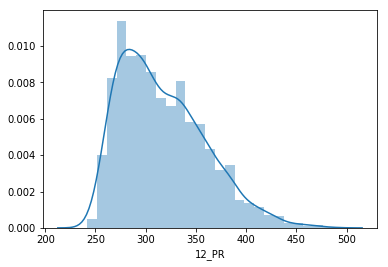

In [10]:
sns.distplot(athlete_data['12_PR'])
plt.show()

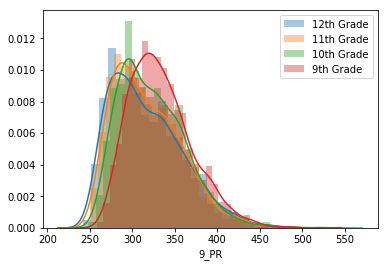

In [14]:
sns.distplot(athlete_data['12_PR'],label = '12th Grade')
sns.distplot(athlete_data['11_PR'],label = '11th Grade')
sns.distplot(athlete_data['10_PR'],label = '10th Grade')
sns.distplot(athlete_data['9_PR'],label = '9th Grade')
plt.legend()
plt.show()

In [31]:
athlete_data[(athlete_data['sex'] == 'boy') & (athlete_data['District'] == 'District 1')]

,Unnamed: 0,ID,Name,School_ID,School,District,9_PR,10_PR,11_PR,12_PR,Grad_Yr,sex
3,3,536508,Hap Emmons,345,King's,District 1,283.22,264.46,261.56,257.71,2012,boy
6,6,264195,Mitch Beard,352,Nooksack Valley,District 1,295.71,291.40,280.61,265.71,2012,boy
13,13,243663,Josh Sowinski,345,King's,District 1,352.59,315.87,302.19,301.82,2011,boy
14,14,243666,Matte Bailey,345,King's,District 1,321.25,322.33,299.13,299.66,2011,boy
16,16,828341,David Dykstra,352,Nooksack Valley,District 1,336.30,333.46,332.60,338.34,2012,boy
21,21,831145,Jonathan Yu,345,King's,District 1,396.00,292.34,287.94,301.15,2012,boy
22,22,536514,Nick Fuller,345,King's,District 1,404.32,374.59,354.00,359.04,2012,boy
32,32,120704,Tyler Williams,398,Burlington-Edison,District 1,273.82,275.54,259.12,262.13,2010,boy
44,44,242430,Chad Linnerooth,394,Cedarcrest,District 1,296.06,282.51,285.00,275.31,2011,boy
48,48,285547,Christian Culp,347,Sultan,District 1,294.71,285.10,281.51,281.90,2011,boy


(240, 450.0)

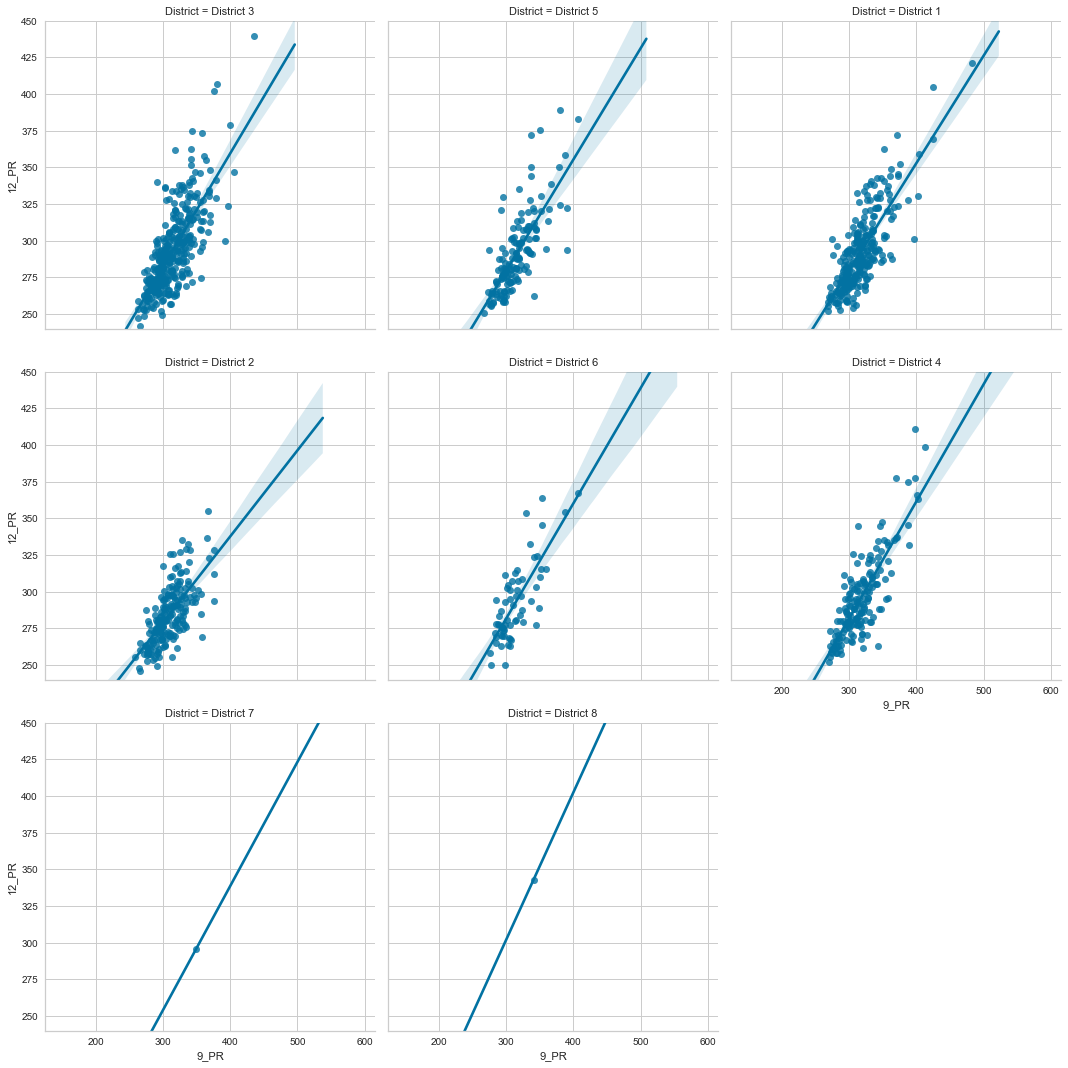

In [49]:
grid=sns.lmplot(x = "9_PR",y = "12_PR",col="District",
                col_wrap=3, 
                data=athlete_data[athlete_data['sex'] == 'boy'])
plt.ylim(top=450)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=240)  # adjust the top leaving bottom unchanged

<Figure size 432x216 with 0 Axes>

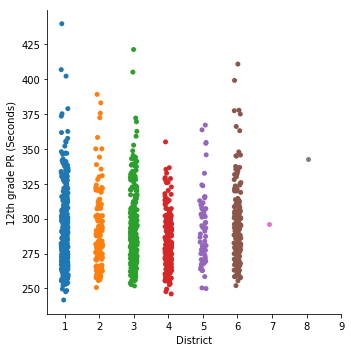

<Figure size 432x216 with 0 Axes>

In [66]:
sns.catplot(x="District",y="12_PR", 
            data=athlete_data[(athlete_data['sex'] == 'boy')])
#plt.figure(figsize=(10,2))
plt.ylabel('12th grade PR (Seconds)')
plt.xlabel('District')
plt.xticks(range(0,9),('1','2','3','4','5','6','7','8','9'))
#plt.figure(figsize=(6,3))

#plt.savefig('12_PR_by_District.png')


## Linear Regression Model <a name='LinearRegression' />

In [23]:
#divide in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [24]:
X_train.shape

(1233, 14)

In [25]:
X_test.shape

(823, 14)

In [26]:
len(X_train)

1233

In [27]:
# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

0.89846449893619207

In [29]:
y_pred = lr.predict(X_test)

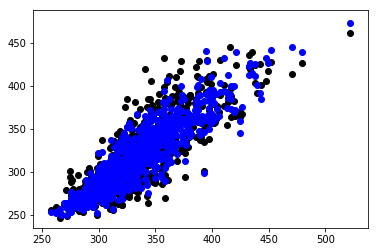

In [32]:
# Plot outputs
plt.scatter(X_test['9_PR'], y_test,  color='black')
plt.scatter(X_test['9_PR'], y_pred, color='blue')


In [ ]:
X.columns

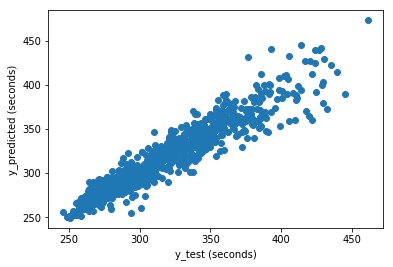

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test (seconds)')
plt.ylabel('y_predicted (seconds)')
#plt.savefig('test_vs_pred.png')


In [69]:
print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, lr.predict(X_train)))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test SSE:', 
      mean_squared_error(y_test, lr.predict(X_test)))
test['9_10_11'] 

Train R^2:  0.898464498936
Train SSE: 185.32709226
Test R^2:  0.893350540322
Test SSE: 185.563057929


In [72]:
#remove 11th grade PR data - how good does it do now
X1_train = X_train.drop(['11_PR'],axis=1)
X1_test = X_test.drop(['11_PR'],axis=1)

lr.fit(X1_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
print('Using only 9th & 10th to predict 12th grade PR')
print('Train R^2: ',lr.score(X1_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, lr.predict(X1_train)))
print('Test R^2: ', lr.score(X1_test, y_test))
print('Test SSE:', 
      mean_squared_error(y_test, lr.predict(X1_test)))

Using only 9th & 10th to predict 12th grade PR
Train R^2:  0.854027889755
Train SSE: 266.434758871
Test R^2:  0.835151618393
Test SSE: 286.825361123


In [75]:
#remove 10th and 11th grade PR data - how good does it do now
X2_train = X_train.drop(['10_PR','11_PR'],axis=1)
X2_test = X_test.drop(['10_PR','11_PR'],axis=1)

lr.fit(X2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
print('Using only 9th grade to predict 12th grade PR')
print('Train R^2: ',lr.score(X2_train, y_train))
print('Train SSE:', 
      mean_squared_error(y_train, lr.predict(X2_train)))
print('Test R^2: ', lr.score(X2_test, y_test))
print('Test SSE:', 
      mean_squared_error(y_test, lr.predict(X2_test)))

Using only 9th grade to predict 12th grade PR
Train R^2:  0.792472737703
Train SSE: 378.787947893
Test R^2:  0.778109954689
Test SSE: 386.074110981


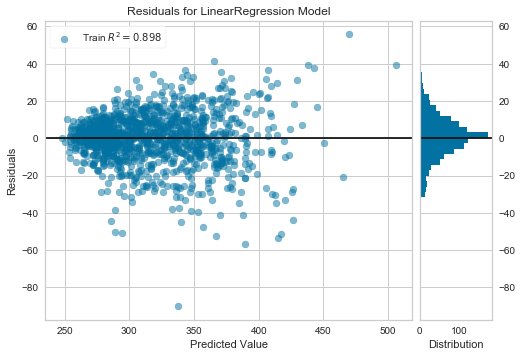

In [77]:
import yellowbrick
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model = lr)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.poof()

Now do it with statsmodels

In [86]:
athlete_data['PR12'] = athlete_data['12_PR']
athlete_data['PR11'] = athlete_data['11_PR']
athlete_data['PR10'] = athlete_data['10_PR']
athlete_data['PR9']  = athlete_data['9_PR']

athlete_data['Nsex'] = [1 if s == 'boy' else 0 for s in athlete_data['sex']]

In [94]:
y, X = patsy.dmatrices('PR12 ~ PR9 + PR10 + PR11 + Nsex + Grad_Yr',
                data = athlete_data, return_type='dataframe')
model = sm.OLS(y,X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   PR12   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     3571.
Date:                Sun, 07 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:                -8281.0
No. Observations:                2056   AIC:                         1.657e+04
Df Residuals:                    2050   BIC:                         1.661e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    254.8919    250.091      1.019      0.3

Explore the effect of sample size on the results.

In [101]:
X.head()

,District_District 1,District_District 2,District_District 3,District_District 4,District_District 5,District_District 6,District_District 7,District_District 8,sex_boy,sex_girl,9_PR,10_PR,11_PR,Grad_Yr
0,0,0,1,0,0,0,0,0,1,0,271.44,264.50,255.28,2011
1,0,0,1,0,0,0,0,0,1,0,276.00,265.58,268.16,2011
2,0,0,0,0,1,0,0,0,1,0,293.90,278.42,281.35,2011
3,1,0,0,0,0,0,0,0,1,0,283.22,264.46,261.56,2012
4,0,0,1,0,0,0,0,0,1,0,302.14,284.32,284.20,2011


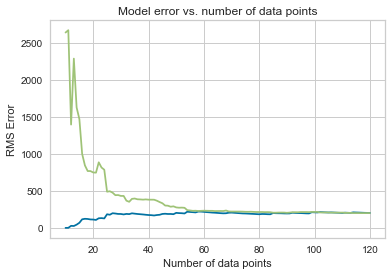

In [157]:
#divide in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

# Create an empty model
lr = LinearRegression()
output_data = pd.DataFrame()

for sample_size in range(10,121,1):
    X2_train = X_train.sample(n=sample_size,random_state=1)
    y2_train = y_train.sample(n=sample_size,random_state=1)
    # Fit the model to the full dataset
    lr.fit(X2_train, y2_train)
    y2_predict = lr.predict(X_test)

    test_score  = lr.score(X_test,y_test)
    train_score = lr.score(X2_train,y2_train)
    train_error = mean_squared_error(y2_train, lr.predict(X2_train))
    test_error  = mean_squared_error(y_test,  lr.predict(X_test))
    #print(sample_size,train_error,test_error)

    output_data = output_data.append([[sample_size,test_score,train_score,train_error,test_error]])
    
    #print('Train R^2: ', train_score)
    #print('Train SSE:', train_error)
    #print('Test R^2: ', test_score)
    #print('Test SSE:', test_error)
    
plt.plot(output_data[0],output_data[3],label='Train Error')
plt.plot(output_data[0],output_data[4],label='Test Error')
plt.title('Model error vs. number of data points');
plt.xlabel('Number of data points');
plt.ylabel('RMS Error');

In [146]:
output_data.head()

,0,1,2,3,4
0,10,-0.517057,1.000000,4.459020e-26,2639.579863
0,11,-0.535205,0.999727,5.812813e-01,2671.156674
0,12,0.197637,0.985932,2.741872e+01,1396.059658
0,13,-0.314439,0.990750,2.530959e+01,2287.037771
0,14,0.064665,0.982885,4.348498e+01,1627.421150


## Modeling District as a mixed effect <a name='MixedEffect' />

Random effect - District    
Fixed effect - PRs from each year, grad year   

We expect to see some clustering due to the random effect variable.

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [87]:
X = pd.DataFrame()
#X = pd.get_dummies(athlete_data[['sex']])

X = pd.concat([X, athlete_data[['PR9','PR10','PR11','Grad_Yr','Nsex','District']]], 
              axis=1, sort=False)

y = athlete_data['PR12']

In [88]:
X.head()

,PR9,PR10,PR11,Grad_Yr,Nsex,District
0,271.44,264.50,255.28,2011,1,District 3
1,276.00,265.58,268.16,2011,1,District 3
2,293.90,278.42,281.35,2011,1,District 5
3,283.22,264.46,261.56,2012,1,District 1
4,302.14,284.32,284.20,2011,1,District 3


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
data_train = pd.concat([y_train,X_train],axis=1,sort=False)
data_test  = pd.concat([y_test,X_test],axis=1,sort=False)

In [90]:
data_train.head()

,PR12,PR9,PR10,PR11,Grad_Yr,Nsex,District
181,262.57,342.18,289.38,268.34,2010,1,District 5
479,328.43,341.66,325.23,331.73,2015,0,District 6
621,265.57,291.08,284.13,277.74,2015,1,District 5
861,262.75,306.41,291.20,268.53,2017,1,District 6
24,415.20,434.75,394.40,383.76,2012,0,District 5


In [91]:
#md = smf.mixedlm("12_PR ~ 9_PR + 10_PR + 11_PR + sex + Grad_Yr",
#                data = athlete_data,
#                groups = athlete_data["District"])

md = smf.mixedlm('PR12 ~ PR9 + PR10 + PR11 + Nsex + Grad_Yr',
                data = data_train,
                groups = data_train['District'])
mdf = md.fit()
print(mdf.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PR12      
No. Observations: 1233    Method:             REML      
No. Groups:       8       Scale:              186.3442  
Min. group size:  1       Likelihood:         -4991.9318
Max. group size:  384     Converged:          No        
Mean group size:  154.1                                 
--------------------------------------------------------
           Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------
Intercept 154.988  322.210  0.481 0.631 -476.533 786.509
PR9         0.038    0.027  1.380 0.168   -0.016   0.091
PR10        0.221    0.037  5.996 0.000    0.149   0.293
PR11        0.711    0.031 23.228 0.000    0.651   0.771
Nsex       -5.715    1.144 -4.994 0.000   -7.957  -3.472
Grad_Yr    -0.073    0.160 -0.454 0.650   -0.387   0.241
Group Var 186.344                                       



/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [92]:
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())
print(RMSE)

13.57782646917128


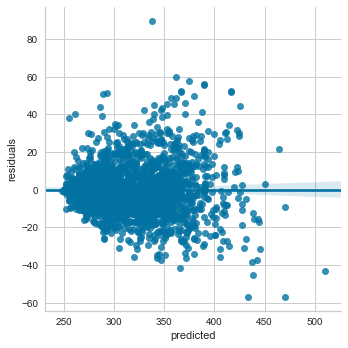

In [81]:
# and let's plot the predictions
performance = pd.DataFrame()
performance["predicted"] = mdf.fittedvalues
performance["residuals"] = mdf.resid.values
#performance["PR12"] = data.age_scaled

sns.lmplot(x = "predicted", y = "residuals", data = performance)